<a href="https://colab.research.google.com/github/Zaheer-10/NeuralNetHub/blob/main/Sentimental_Analysis_Using_RNN_(Keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

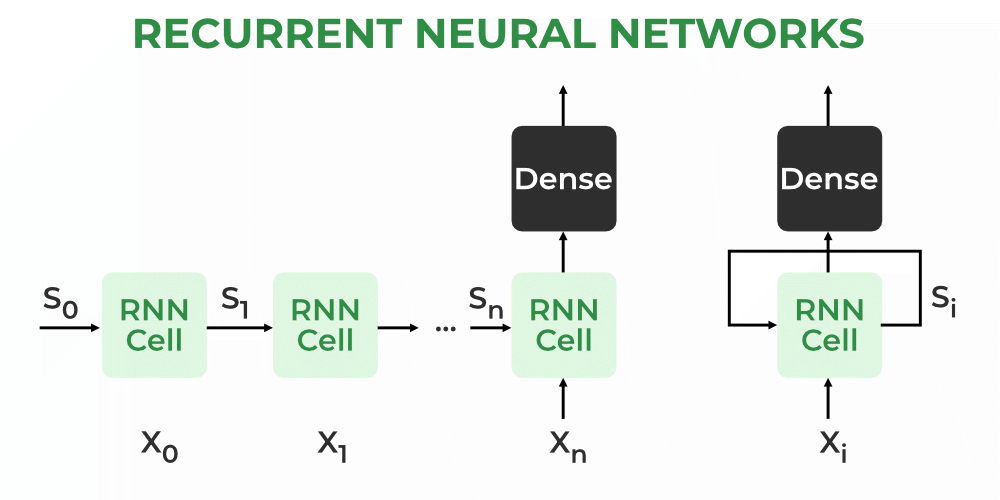

In [12]:
import tensorflow as tf
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.layers import Embedding , Dense , SimpleRNN
from keras.models import Sequential

In [8]:
(x_train, y_train) , (x_test,y_test) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [13]:
# pre-Process
x_train = pad_sequences(x_train , padding='post' , maxlen = 50)
x_test = pad_sequences(x_train , padding='post' , maxlen = 50)


In [15]:
len(x_train)

25000

In [17]:
# Build Model

Model = Sequential()

Model.add(SimpleRNN(32,input_shape=(50,1),return_sequences=False))
Model.add(Dense(1, activation='sigmoid'))
Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [19]:
Model.compile(loss = 'binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])
Model.fit(x_train , y_train, epochs=10 , validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 38s 41ms/step - loss: 0.6955 - accuracy: 0.5009 - val_loss: 0.6957 - val_accuracy: 0.4983
Epoch 2/10
782/782 [==============================] - 37s 47ms/step - loss: 0.6938 - accuracy: 0.5037 - val_loss: 0.6952 - val_accuracy: 0.4988
Epoch 3/10
782/782 [==============================] - 31s 39ms/step - loss: 0.6933 - accuracy: 0.5079 - val_loss: 0.6975 - val_accuracy: 0.4991
Epoch 4/10
782/782 [==============================] - 32s 42ms/step - loss: 0.6933 - accuracy: 0.5077 - val_loss: 0.6966 - val_accuracy: 0.4976
Epoch 5/10
782/782 [==============================] - 36s 46ms/step - loss: 0.6932 - accuracy: 0.5116 - val_loss: 0.6962 - val_accuracy: 0.5001
Epoch 6/10
782/782 [==============================] - 35s 45ms/step - loss: 0.6931 - accuracy: 0.5106 - val_loss: 0.6948 - val_accuracy: 0.4972
Epoch 7/10
782/782 [==============================] - 31s 40ms/step - loss: 0.6931 - accuracy: 0.5054 - val_loss: 0.6977 - val_accuracy:

In [21]:

from keras.preprocessing.text import Tokenizer

# Define new_reviews
new_reviews = [
    "This movie is fantastic! I highly recommend it.",
    "The acting was terrible and the plot was boring.",
    "I'm not sure how I feel about this movie."
]

# Tokenize the new data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_reviews)
new_sequences = tokenizer.texts_to_sequences(new_reviews)

# Pad the sequences
maxlen = 50
new_sequences = pad_sequences(new_sequences, maxlen=maxlen)

# Perform predictions
predictions = Model.predict(new_sequences)

# Print the predictions
for review, prediction in zip(new_reviews, predictions):
    print(f"Review: {review}")
    print(f"Sentiment: {'Positive' if prediction > 0.5 else 'Negative'}")
    print(f"Confidence: {prediction[0]}")
    print()


1/1 [==============================] - 0s 155ms/step
Review: This movie is fantastic! I highly recommend it.
Sentiment: Negative
Confidence: 0.4404049515724182

Review: The acting was terrible and the plot was boring.
Sentiment: Negative
Confidence: 0.41586700081825256

Review: I'm not sure how I feel about this movie.
Sentiment: Positive
Confidence: 0.6029382348060608

